In [1]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys

### For Colab

In [ ]:
# # This mounts your Google Drive to the Colab VM.
# from google.colab import drive
# drive.mount('/content/drive')

# # TODO: Enter the foldername in your Drive where you have saved the unzipped
# # assignment folder, e.g. 'cs231n/assignments/assignment1/'
# FOLDERNAME = 'PyTorch Test Project/N_TXT'
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# # Now that we've mounted your Drive, this ensures that
# # the Python interpreter of the Colab VM can load
# # python files from within it.
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# # This downloads the CIFAR-10 dataset to your Drive
# # if it doesn't already exist.
# # %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# # !bash get_datasets.sh
# # %cd /content/drive/My\ Drive/$FOLDERNAME

In [ ]:
# path = "/content/drive/MyDrive/PyTorch Test Project/N_TXT"

# os.chdir(path)

# fx_data = np.array([], dtype=np.float32)

# #gets data from file specified by file_path
# def get_contents(file_path):
#     global fx_data
#     skip_lines = 7

#     with open(file_path,'r') as file:

#         for skips in range(skip_lines):
#             next(file)

#         lines = file.readlines()[:-1]

#         for line in lines:
#             data = line.split()[-1]
#             fx_data = np.append(fx_data, np.float32(data))
#             #print(data)

In [2]:
path = "/Users/jm/VS Code/ML/Time Series Prediction/N_TXT"

os.chdir(path)

fx_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global fx_data
    skip_lines = 7

    with open(file_path,'r') as file:

        for skips in range(skip_lines):
            next(file)

        lines = file.readlines()[:-1]

        for line in lines:
            data = line.split()[-1]
            fx_data = np.append(fx_data, np.float32(data))
            #print(data)

In [3]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        print(f"Currently working on: {file_path}")
        get_contents(file_path)

fx_data.dtype

Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/9Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/8Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/1Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/3Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/10Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/2Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/11Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/7Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/6Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/4Npie.txt
Currently working on: /Users/jm/VS Code/ML/Time Series Prediction/N_TXT/5Npie.txt


dtype('float32')

In [4]:
#create time "sample" for dataframe
time_data = np.array([], dtype=np.float32)

for x in range(len(fx_data)):
    time_data = np.append(time_data, np.float32(x))
    type(x)

time_data, time_data[0].dtype

(array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05], dtype=float32),
 dtype('float32'))

In [5]:
#create time "sample" for dataframe
dataset = pd.DataFrame({"Time": time_data,
                        "FX Channel": fx_data})
dataset

,Time,FX Channel
0,0.0,-0.6
1,1.0,-0.6
2,2.0,-0.6
3,3.0,-0.6
4,4.0,-0.6
...,...,...
187855,187855.0,4.1
187856,187856.0,4.1
187857,187857.0,4.1
187858,187858.0,4.1


([<matplotlib.lines.Line2D at 0x32628c2e0>], pandas.core.frame.DataFrame)

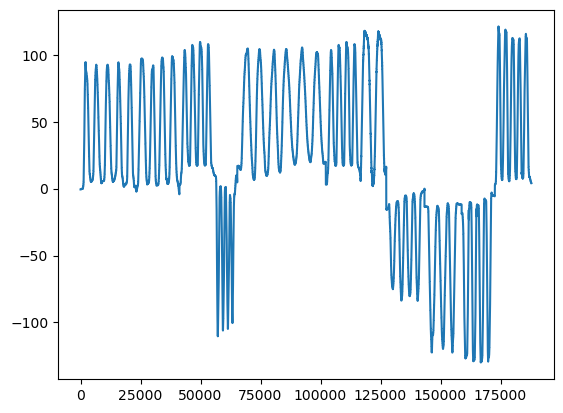

In [6]:
plt.plot(dataset["Time"], dataset["FX Channel"]), type(dataset)

In [7]:
from copy import deepcopy as dc

def lstm_dataframe(df, n_steps):
    df = dc(df)
    
    # df.set_index("FX Channel")

    for i in range(1, n_steps+1):
        df[f'Time(t-{i})'] = df['Time'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

n_steps = 1024
shifted_df = lstm_dataframe(dataset, n_steps)

shifted_df, shifted_df.shape

/var/folders/4p/ths4mw3d4gx2tp708qp5jbqr0000gn/T/ipykernel_51811/1340268036.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Time(t-{i})'] = df['Time'].shift(i)
/var/folders/4p/ths4mw3d4gx2tp708qp5jbqr0000gn/T/ipykernel_51811/1340268036.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Time(t-{i})'] = df['Time'].shift(i)
/var/folders/4p/ths4mw3d4gx2tp708qp5jbqr0000gn/T/ipykernel_51811/1340268036.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

(            Time  FX Channel  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 1024      1024.0         0.7     1023.0     1022.0     1021.0     1020.0   
 1025      1025.0         0.7     1024.0     1023.0     1022.0     1021.0   
 1026      1026.0         0.7     1025.0     1024.0     1023.0     1022.0   
 1027      1027.0         0.7     1026.0     1025.0     1024.0     1023.0   
 1028      1028.0         0.8     1027.0     1026.0     1025.0     1024.0   
 ...          ...         ...        ...        ...        ...        ...   
 187855  187855.0         4.1   187854.0   187853.0   187852.0   187851.0   
 187856  187856.0         4.1   187855.0   187854.0   187853.0   187852.0   
 187857  187857.0         4.1   187856.0   187855.0   187854.0   187853.0   
 187858  187858.0         4.1   187857.0   187856.0   187855.0   187854.0   
 187859  187859.0         4.1   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  Time(t-8)  ...  Time(t-1015)  \


In [8]:
columnsTitles = ['FX Channel', 'Time']

for i in range(1023):
    columnsTitles.append(f"Time(t-{i})")

shifted_df = shifted_df.reindex(columns=columnsTitles)
shifted_df = shifted_df.drop(columns=["Time(t-0)"])

shifted_df, type(columnsTitles), len(columnsTitles), shifted_df.shape

(        FX Channel      Time  Time(t-1)  Time(t-2)  Time(t-3)  Time(t-4)  \
 1024           0.7    1024.0     1023.0     1022.0     1021.0     1020.0   
 1025           0.7    1025.0     1024.0     1023.0     1022.0     1021.0   
 1026           0.7    1026.0     1025.0     1024.0     1023.0     1022.0   
 1027           0.7    1027.0     1026.0     1025.0     1024.0     1023.0   
 1028           0.8    1028.0     1027.0     1026.0     1025.0     1024.0   
 ...            ...       ...        ...        ...        ...        ...   
 187855         4.1  187855.0   187854.0   187853.0   187852.0   187851.0   
 187856         4.1  187856.0   187855.0   187854.0   187853.0   187852.0   
 187857         4.1  187857.0   187856.0   187855.0   187854.0   187853.0   
 187858         4.1  187858.0   187857.0   187856.0   187855.0   187854.0   
 187859         4.1  187859.0   187858.0   187857.0   187856.0   187855.0   
 
         Time(t-5)  Time(t-6)  Time(t-7)  Time(t-8)  ...  Time(t-1013)  \


In [9]:
dataset = shifted_df.to_numpy()

dataset.shape, dataset


((186836, 1024),
 array([[7.00000e-01, 1.02400e+03, 1.02300e+03, ..., 4.00000e+00,
         3.00000e+00, 2.00000e+00],
        [7.00000e-01, 1.02500e+03, 1.02400e+03, ..., 5.00000e+00,
         4.00000e+00, 3.00000e+00],
        [7.00000e-01, 1.02600e+03, 1.02500e+03, ..., 6.00000e+00,
         5.00000e+00, 4.00000e+00],
        ...,
        [4.10000e+00, 1.87857e+05, 1.87856e+05, ..., 1.86837e+05,
         1.86836e+05, 1.86835e+05],
        [4.10000e+00, 1.87858e+05, 1.87857e+05, ..., 1.86838e+05,
         1.86837e+05, 1.86836e+05],
        [4.10000e+00, 1.87859e+05, 1.87858e+05, ..., 1.86839e+05,
         1.86838e+05, 1.86837e+05]], dtype=float32))

In [19]:
X = dataset[:, 1:]
y = dataset[:, 0]

X.shape, y.shape, y[0], X[0]

((186836, 1023),
 (186836,),
 0.7,
 array([1024., 1023., 1022., ...,    4.,    3.,    2.], dtype=float32))

In [20]:
X = dc(np.flip(X, axis=1))
X

array([[2.00000e+00, 3.00000e+00, 4.00000e+00, ..., 1.02200e+03,
        1.02300e+03, 1.02400e+03],
       [3.00000e+00, 4.00000e+00, 5.00000e+00, ..., 1.02300e+03,
        1.02400e+03, 1.02500e+03],
       [4.00000e+00, 5.00000e+00, 6.00000e+00, ..., 1.02400e+03,
        1.02500e+03, 1.02600e+03],
       ...,
       [1.86835e+05, 1.86836e+05, 1.86837e+05, ..., 1.87855e+05,
        1.87856e+05, 1.87857e+05],
       [1.86836e+05, 1.86837e+05, 1.86838e+05, ..., 1.87856e+05,
        1.87857e+05, 1.87858e+05],
       [1.86837e+05, 1.86838e+05, 1.86839e+05, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05]], dtype=float32)

In [21]:
#trying to split data loader now? not too sure if this is the best way
split_idx = int(0.8 * len(dataset))

X_train = X[:split_idx]
X_test = X[split_idx:]

y_train = y[:split_idx]
y_test = y[split_idx:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149468, 1023), (37368, 1023), (149468,), (37368,))

In [22]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([149468, 1023]),
 torch.Size([37368, 1023]),
 torch.Size([149468]),
 torch.Size([37368]))

In [23]:
# plt.plot(X_train, y_train)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.fit_transform(y_test.reshape(-1, 1))

X_train.shape, y_train.shape

((149468, 1023), (149468, 1))

In [25]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([149468, 1023]),
 torch.Size([37368, 1023]),
 torch.Size([149468, 1]),
 torch.Size([37368, 1]))

In [26]:
type(X_train)

torch.Tensor

In [27]:
X_train = X_train.unsqueeze(dim = 2)
X_test = X_test.unsqueeze(dim = 2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([149468, 1023, 1]),
 torch.Size([37368, 1023, 1]),
 torch.Size([149468, 1]),
 torch.Size([37368, 1]))

In [28]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([149468, 1023, 1]),
 torch.Size([37368, 1023, 1]),
 torch.Size([149468, 1]),
 torch.Size([37368, 1]))

In [30]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [31]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 16

#turn datasets into iterables (batches)
train_loader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False)

#check out what we've created
# print(f"Dataloaders: {train_dataloader, test_dataloader}")
# print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
# print(f"Length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

In [32]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 1023, 1]) torch.Size([16, 1])


In [33]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [34]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True, dropout=0.5)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 8, 1)
model.to(device)
model

/Users/jm/miniforge3/lib/python3.10/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


LSTM(
  (lstm): LSTM(1, 8, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [35]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [36]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [37]:
learning_rate = 0.01
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate, 
                             weight_decay=1e-5)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.168
Batch 200, Loss: 0.136
Batch 300, Loss: 0.122
Batch 400, Loss: 0.137
Batch 500, Loss: 0.133
Batch 600, Loss: 0.140
Batch 700, Loss: 0.126
Batch 800, Loss: 0.119
Batch 900, Loss: 0.120
Batch 1000, Loss: 0.121
Batch 1100, Loss: 0.127
Batch 1200, Loss: 0.117
Batch 1300, Loss: 0.128
Batch 1400, Loss: 0.121
Batch 1500, Loss: 0.132
Batch 1600, Loss: 0.116
Batch 1700, Loss: 0.120
Batch 1800, Loss: 0.123
Batch 1900, Loss: 0.131
Batch 2000, Loss: 0.117
Batch 2100, Loss: 0.148
Batch 2200, Loss: 0.146
Batch 2300, Loss: 0.134
Batch 2400, Loss: 0.122
Batch 2500, Loss: 0.120
Batch 2600, Loss: 0.118
Batch 2700, Loss: 0.120
Batch 2800, Loss: 0.117
Batch 2900, Loss: 0.117
Batch 3000, Loss: 0.125
Batch 3100, Loss: 0.108
Batch 3200, Loss: 0.120
Batch 3300, Loss: 0.149
Batch 3400, Loss: 0.147
Batch 3500, Loss: 0.111
Batch 3600, Loss: 0.107


KeyboardInterrupt: 

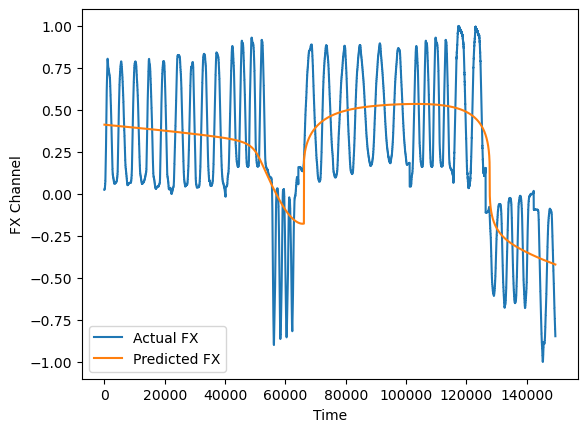

In [38]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual FX')
plt.plot(predicted, label='Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()


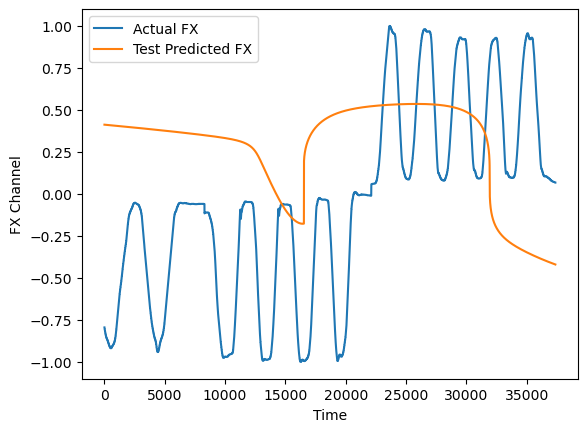

In [39]:
model.eval()
with torch.inference_mode():
    test_pred = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()